## Importing Libraries

In [1]:
# Importing all the required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [ ]:
df = pd.read_csv(r"C:\Users\H P\Desktop\Real_Estate_Investment_Advisor_Using_ML_Streamlit\project_jupyter_file\india_housing_prices.csv")
df

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,Furnished,22,1,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,Unfurnished,21,20,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,Semi-furnished,19,27,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,Furnished,21,26,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,Semi-furnished,3,2,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,249996,Gujarat,Ahmedabad,Locality_187,Independent House,5,1995,274.75,0.14,1995,Furnished,19,7,30,8,6,Low,No,No,"Playground, Garden, Gym, Clubhouse, Pool",East,Broker,Under_Construction
249996,249997,Tamil Nadu,Chennai,Locality_348,Apartment,1,2293,13.40,0.01,2013,Semi-furnished,15,25,12,8,10,Low,No,No,Playground,South,Broker,Ready_to_Move
249997,249998,Telangana,Warangal,Locality_225,Villa,4,2910,236.94,0.08,2003,Furnished,21,30,22,10,4,High,Yes,Yes,Playground,South,Builder,Under_Construction
249998,249999,Odisha,Cuttack,Locality_138,Villa,1,1149,141.66,0.12,2007,Unfurnished,14,11,18,3,7,Low,Yes,Yes,"Playground, Gym, Pool",South,Owner,Ready_to_Move


## Data Wrangling

In [3]:
# checking the first 5 rows of the dataset
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,Furnished,22,1,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,Unfurnished,21,20,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,Semi-furnished,19,27,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,Furnished,21,26,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,Semi-furnished,3,2,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


#### This function will show us the first 5 rows with all columns inclusive.

In [4]:
# Checking the last 5 rows of the dataset
df.tail()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
249995,249996,Gujarat,Ahmedabad,Locality_187,Independent House,5,1995,274.75,0.14,1995,Furnished,19,7,30,8,6,Low,No,No,"Playground, Garden, Gym, Clubhouse, Pool",East,Broker,Under_Construction
249996,249997,Tamil Nadu,Chennai,Locality_348,Apartment,1,2293,13.40,0.01,2013,Semi-furnished,15,25,12,8,10,Low,No,No,Playground,South,Broker,Ready_to_Move
249997,249998,Telangana,Warangal,Locality_225,Villa,4,2910,236.94,0.08,2003,Furnished,21,30,22,10,4,High,Yes,Yes,Playground,South,Builder,Under_Construction
249998,249999,Odisha,Cuttack,Locality_138,Villa,1,1149,141.66,0.12,2007,Unfurnished,14,11,18,3,7,Low,Yes,Yes,"Playground, Gym, Pool",South,Owner,Ready_to_Move
249999,250000,Haryana,Gurgaon,Locality_268,Independent House,3,4313,199.69,0.05,1990,Semi-furnished,22,28,35,10,6,Medium,No,No,"Gym, Garden",South,Owner,Under_Construction


#### This function will show us the last 5 rows with all columns inclusive.

In [5]:
# checking the shape of the dataset
df.shape

(250000, 23)

#### The dataset has around 2,50,000 Rows and 23 Columns respectively.

In [6]:
# checking the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

#### This function will show us the information present in the dataset on the basis of Column Names, Non Null count's and Dtype (Data types).

In [7]:
# checking the statistical measures of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,250000.0,125000.500000,72168.927986,1.0,62500.75,125000.50,187500.25,250000.00
BHK,250000.0,2.999396,1.415521,1.0,2.00,3.00,4.00,5.00
Size_in_SqFt,250000.0,2749.813216,1300.606954,500.0,1623.00,2747.00,3874.00,5000.00
Price_in_Lakhs,250000.0,254.586854,141.349921,10.0,132.55,253.87,376.88,500.00
Price_per_SqFt,250000.0,0.130597,0.130747,0.0,0.05,0.09,0.16,0.99
Year_Built,250000.0,2006.520012,9.808575,1990.0,1998.00,2007.00,2015.00,2023.00
Floor_No,250000.0,14.966800,8.948047,0.0,7.00,15.00,23.00,30.00
Total_Floors,250000.0,15.503004,8.671618,1.0,8.00,15.00,23.00,30.00
Age_of_Property,250000.0,18.479988,9.808575,2.0,10.00,18.00,27.00,35.00
Nearby_Schools,250000.0,5.499860,2.878639,1.0,3.00,5.00,8.00,10.00


#### The output shows the Statistical Descriptions of all the Numeric values in the dataset.

In [8]:
# Checking on the missing values in the dataset
df.isna().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

#### there is no missing values or null counts in the dataset, so it's a perfect call from the null counts point of view.

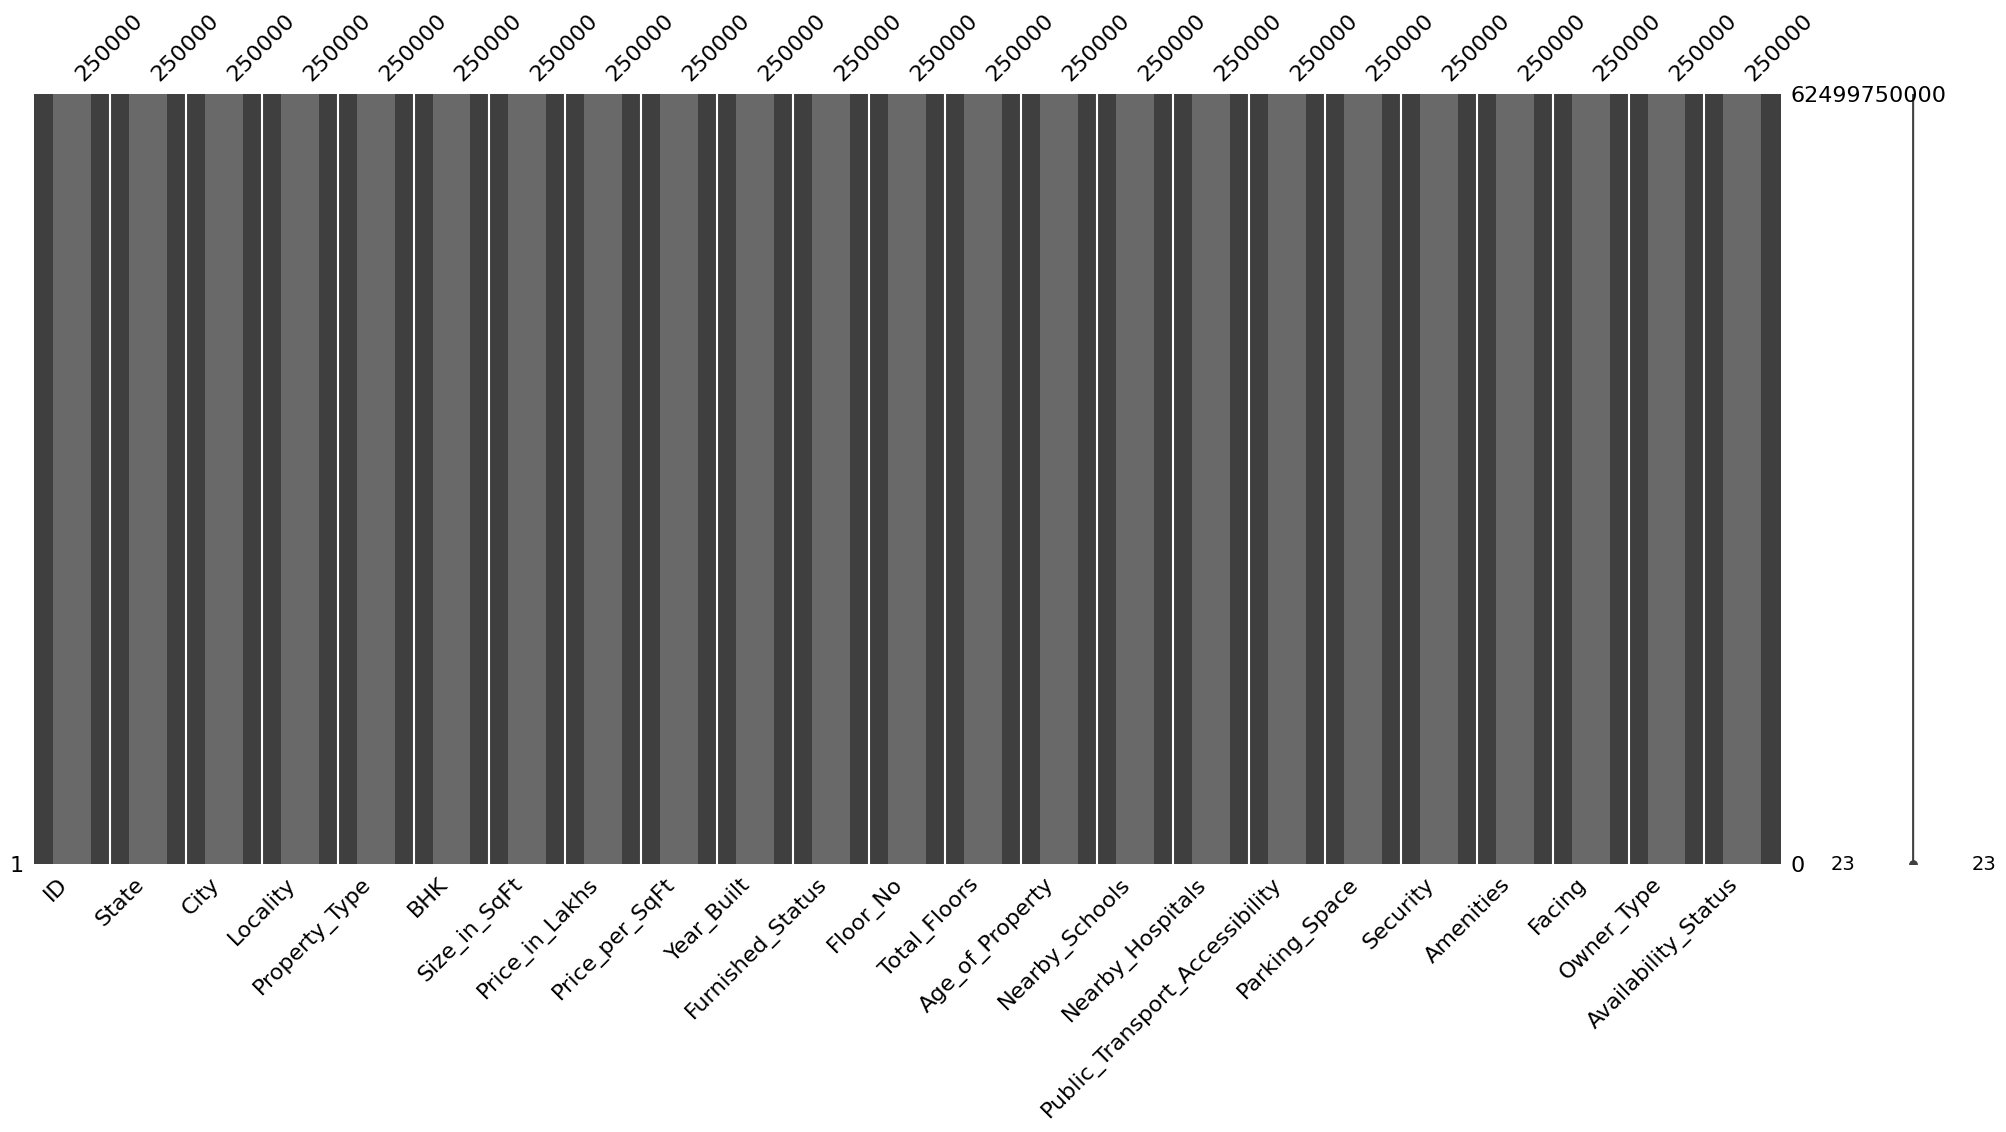

In [9]:
# Visualizing the missing values using missingno library
import missingno as msno
msno.matrix(df)
msno.bar(df)
plt.show()

#### The chart is clearly showing there are no null values present in the dataset.

In [10]:
# Checking for the duplicate values in the dataset
print(df.duplicated().sum())

0


#### So, there are no duplicated rows, which indicates the dataset is ready for the analysis purpose.

In [11]:
# Removing the extra spaces from the column names if present
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')

#### I just removed the extra space from the columns if they are present.

In [12]:
# Checking the column names and their data types
pd.DataFrame({'Column Name': df.columns, 'Data Type': df.dtypes}).reset_index(drop=True)

,Column Name,Data Type
0,ID,int64
1,State,object
2,City,object
3,Locality,object
4,Property_Type,object
5,BHK,int64
6,Size_in_SqFt,int64
7,Price_in_Lakhs,float64
8,Price_per_SqFt,float64
9,Year_Built,int64


In [13]:
# checking over the columns with float data type
float_cols = df.select_dtypes(include=['float64']).columns
pd.DataFrame(float_cols, columns=['Float Columns'])

,Float Columns
0,Price_in_Lakhs
1,Price_per_SqFt


In [14]:
# checking over the columns with categorical data types
cat_cols = df.select_dtypes(include=['object']).columns
pd.DataFrame(cat_cols, columns=['Categorical Columns'])


,Categorical Columns
0,State
1,City
2,Locality
3,Property_Type
4,Furnished_Status
5,Public_Transport_Accessibility
6,Parking_Space
7,Security
8,Amenities
9,Facing


In [15]:
# checking over the columns with integer data types
int_cols = df.select_dtypes(include=['int64']).columns
pd.DataFrame(int_cols, columns=['Integer Columns'])


,Integer Columns
0,ID
1,BHK
2,Size_in_SqFt
3,Year_Built
4,Floor_No
5,Total_Floors
6,Age_of_Property
7,Nearby_Schools
8,Nearby_Hospitals


In [16]:
# handling the missing values in the dataset

# separating numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

pd.DataFrame(numeric_cols, columns=['Numeric Columns'])

,Numeric Columns
0,ID
1,BHK
2,Size_in_SqFt
3,Price_in_Lakhs
4,Price_per_SqFt
5,Year_Built
6,Floor_No
7,Total_Floors
8,Age_of_Property
9,Nearby_Schools


In [17]:
pd.DataFrame(categorical_cols, columns=['Categorical Columns'])

,Categorical Columns
0,State
1,City
2,Locality
3,Property_Type
4,Furnished_Status
5,Public_Transport_Accessibility
6,Parking_Space
7,Security
8,Amenities
9,Facing


In [18]:
# Filling the missing values in numeric columns with median value
for col in numeric_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

# Filling the missing values in categorical columns with mode value
for col in categorical_cols:
    mode_value = df[col].mode()[0]  # mode() returns a Series, so we take the first value
    df[col] = df[col].fillna(mode_value)

### Why handle missing values even when there are no missing values?

#### Because real-world data is never perfect. Even if the current dataset has no missing values, future data (like user input in Streamlit) may have blanks. If we don’t handle missing values, the model may crash when a missing value appears. So we include this step to make the model safe, stable, and ready for real usage.

In [19]:
# checking again for missing values in the dataset
df.isna().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

## Feature Engineering

In [20]:
# creating Future_Price_5Y 

# Assuming 8% yearly growth rate for now
growth_rate = 0.08
years = 5
growth_factor = (1 + growth_rate) ** years

if 'Future_Price_5Y' not in df.columns:
    df['Future_Price_5Y'] = df['Price_in_Lakhs'] * growth_factor

df[['Price_in_Lakhs', 'Future_Price_5Y']].head()

,Price_in_Lakhs,Future_Price_5Y
0,489.76,719.618119
1,195.52,287.283026
2,183.79,270.047807
3,300.29,441.224528
4,182.90,268.740105


In [21]:
# Creating a Good Investment label

if "Good_Investment" not in df.columns:
    if "City" in df.columns:
        city_median = df.groupby("City")["Price_per_SqFt"].transform('median')
        df['Good_Investment'] = (df['Price_per_SqFt'] <= city_median).astype(int)
    else:
        # If there is no City column, we can use overall median
        overall_median = df['Price_per_SqFt'].median()
        df['Good_Investment'] = (df['Price_per_SqFt'] <= overall_median).astype(int)

df[['Price_per_SqFt', 'Good_Investment']].head()

,Price_per_SqFt,Good_Investment
0,0.10,0
1,0.08,1
2,0.05,1
3,0.11,0
4,0.04,1


## EDA 

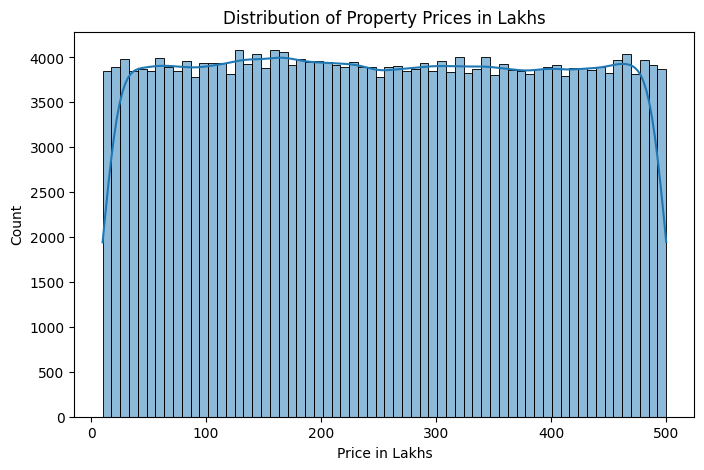

In [22]:
# Distribution of Price_in_Lakhs
plt.figure(figsize=(8, 5))
sns.histplot(df['Price_in_Lakhs'], kde = True)
plt.title("Distribution of Property Prices in Lakhs")
plt.xlabel("Price in Lakhs")
plt.ylabel("Count")
plt.show()

### What is the distribution of Property prices

#### The price distribution shows how property prices are spread across the dataset. It helps identify whether most properties are cheap, mid-range, or expensive. It also shows if the data is skewed or contains extreme price values.

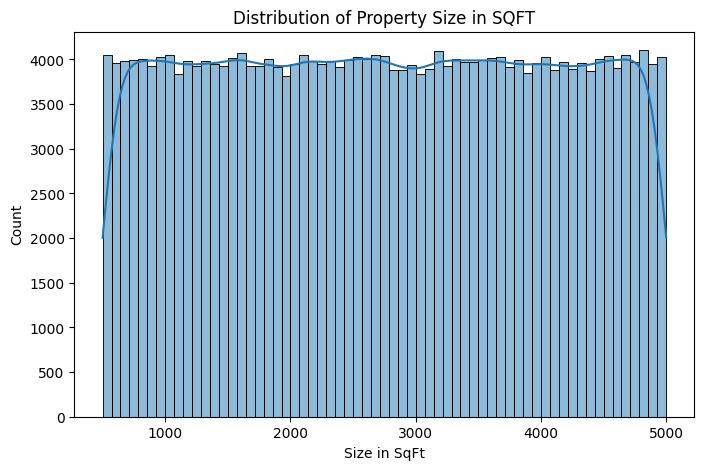

In [23]:
# Distribution of Size_in_SqFt

plt.figure(figsize=(8, 5))
sns.histplot(df["Size_in_SqFt"], kde = True)
plt.title("Distribution of Property Size in SQFT")
plt.xlabel("Size in SqFt")
plt.ylabel("Count")
plt.show()

### What is the distribution of Size in SqFt?

#### This tells us how property sizes (sq ft) vary in the dataset. It helps understand common property sizes and detect very large or very small unusual values. Useful for spotting outliers.

In [24]:
# Average Price per Sqft by City (Top 10 by Count)
city_price = df.groupby("City")["Price_per_SqFt"].mean().sort_values(ascending=False).head(10)
city_price

City
Surat             0.133877
Mangalore         0.133726
Pune              0.132973
Mysore            0.132483
Vishakhapatnam    0.132442
Hyderabad         0.132310
Kochi             0.132059
Indore            0.131884
Durgapur          0.131879
Mumbai            0.131665
Name: Price_per_SqFt, dtype: float64

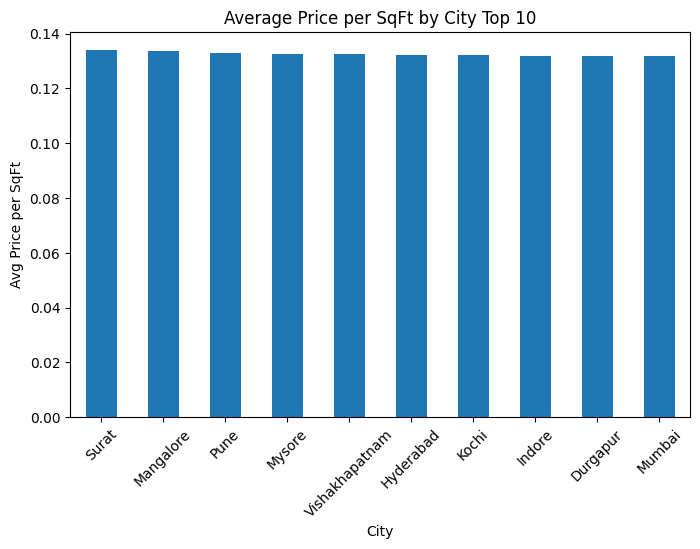

In [25]:
plt.figure(figsize=(8, 5))
city_price.plot(kind='bar')
plt.title("Average Price per SqFt by City Top 10")
plt.ylabel("Avg Price per SqFt")
plt.xticks(rotation = 45)
plt.show()

### What is the average property price by city?

#### Cities differ heavily in price due to demand and development. This shows which cities are most expensive or cheapest. Helps investors pick profitable locations.

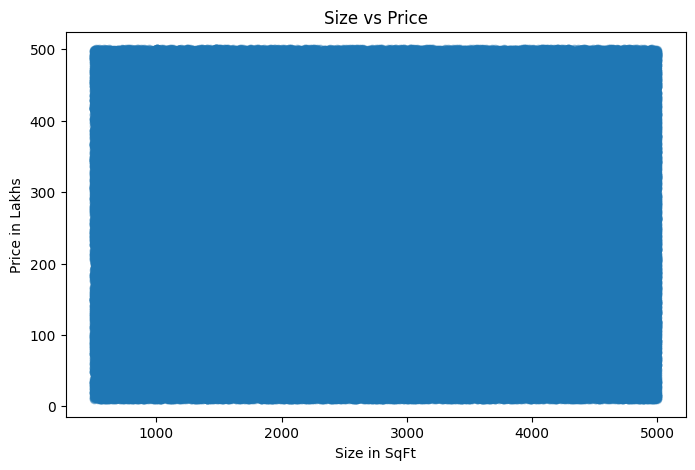

In [26]:
# relationship between Size and Price

plt.figure(figsize=(8, 5))
plt.scatter(df['Size_in_SqFt'], df['Price_in_Lakhs'], alpha=0.4)
plt.title("Size vs Price")
plt.xlabel("Size in SqFt")
plt.ylabel("Price in Lakhs")
plt.show()

### Is there a relationship between property size and price?

#### Usually, larger properties tend to cost more. By checking the relationship, we see how strongly size influences price. This helps validate if the dataset follows common real-estate patterns.

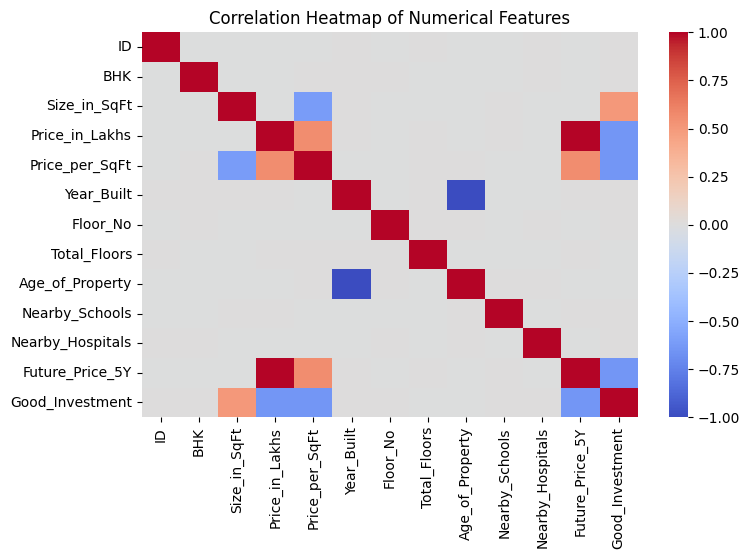

In [27]:
# Correlation heatmap of Numerical Features

plt.figure(figsize=(8, 5))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### How are numeric features correlated with each other?

#### Correlation shows how strongly two numeric variables are related. Helps identify features that move together (example: size vs price). Useful for selecting important features for ML models.

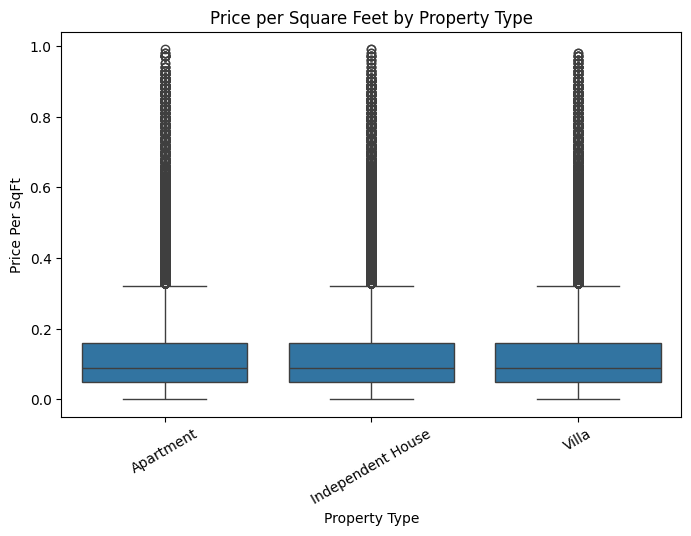

In [28]:
# Price per SqFt comparison by Property Type

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Property_Type", y="Price_per_SqFt")
plt.title("Price per Square Feet by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Price Per SqFt")
plt.xticks(rotation=30)
plt.show()

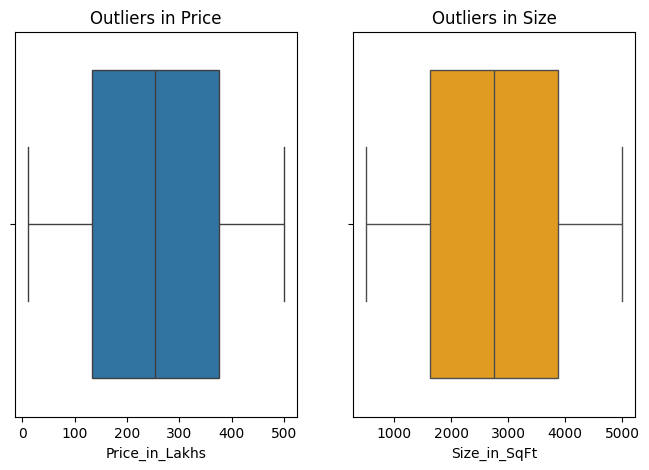

In [29]:
# Detecting Outliers in Price and Size

plt.figure(figsize=(8, 5))
plt.subplot(1,2,1)
sns.boxplot(x=df['Price_in_Lakhs'])
plt.title("Outliers in Price")

plt.subplot(1,2,2)
sns.boxplot(x=df["Size_in_SqFt"], color="orange")
plt.title("Outliers in Size")

plt.show()

### Are there any outliers in price per sq ft or property size?

#### Outliers are unusual values much bigger or smaller than the rest. Identifying them helps clean data and avoid model distortion. Outliers often appear in luxury or extremely small properties.

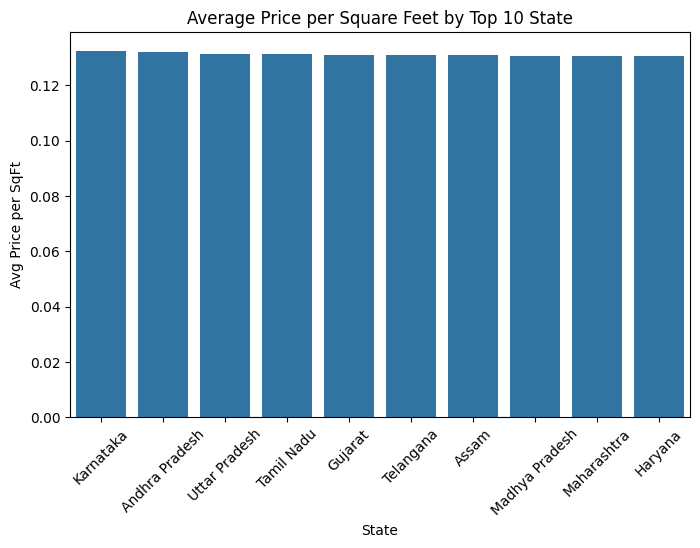

In [30]:
# Average Prie per Square Feet by State

state_price = df.groupby("State")["Price_per_SqFt"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=state_price.index, y=state_price.values)
plt.title("Average Price per Square Feet by Top 10 State")
plt.xlabel("State")
plt.ylabel("Avg Price per SqFt")
plt.xticks(rotation=45)
plt.show()

### What is the average price per sq ft by state?

#### Shows which states have higher or lower real-estate value. Useful for comparing markets across regions. Helps identify high-value and affordable states.

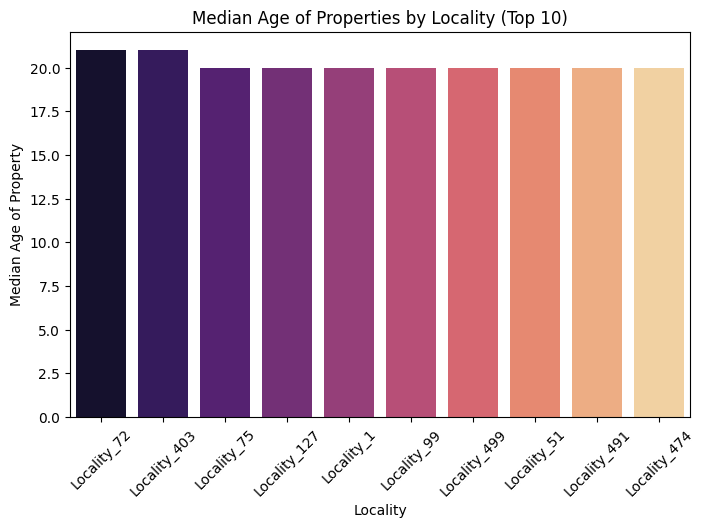

In [31]:
# Median Age of Property by Locality
locality_age = df.groupby("Locality")["Age_of_Property"].median().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=locality_age.index, y=locality_age.values, palette="magma")
plt.title("Median Age of Properties by Locality (Top 10)")
plt.xlabel("Locality")
plt.ylabel("Median Age of Property")
plt.xticks(rotation=45)
plt.show()

### What is the median age of properties by locality?

#### This reveals whether a locality mostly has new, mid-aged, or old properties. Newer areas may offer better appreciation, while older ones may offer lower cost. Helps understand locality development.

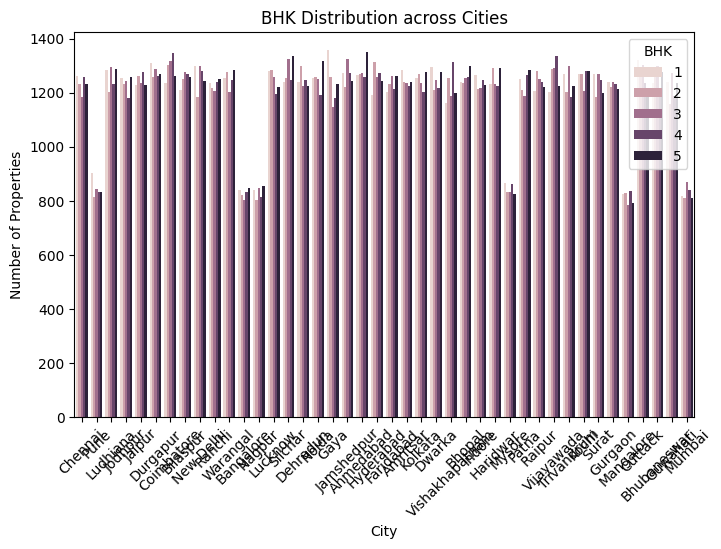

In [32]:
# BHK Distribution across City

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="City", hue="BHK")
plt.title("BHK Distribution across Cities")
plt.xlabel("City")
plt.ylabel("Number of Properties")
plt.xticks(rotation=45)
plt.legend(title="BHK")
plt.show()

### How is BHK distributed across cities?

#### Shows how many 1BHK, 2BHK, 3BHK, etc., properties exist per city. Useful to spot cities with more family-sized or compact homes. Helps understand city lifestyle patterns.

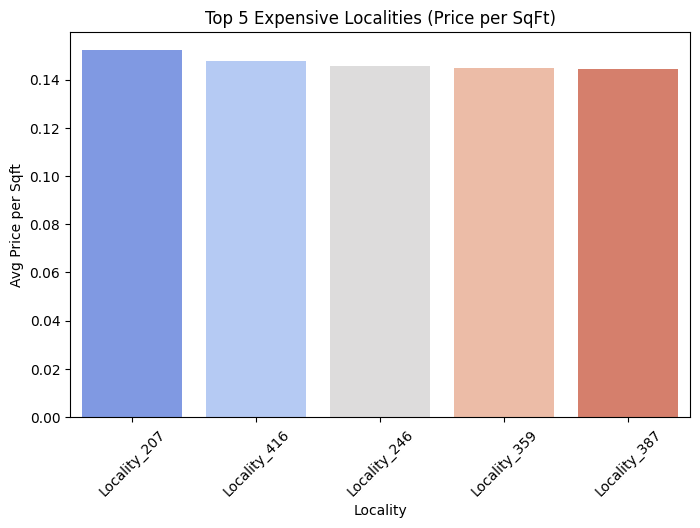

In [33]:
# Top 5 Expensive Localities Based on Price per Sqft

locality_expensive = df.groupby("Locality")["Price_per_SqFt"].mean().sort_values(ascending=False).head()

plt.figure(figsize=(8, 5))
sns.barplot(x=locality_expensive.index, y=locality_expensive.values, palette="coolwarm")
plt.title("Top 5 Expensive Localities (Price per SqFt)")
plt.xlabel("Locality")
plt.ylabel("Avg Price per Sqft")
plt.xticks(rotation=45)
plt.show()

### What are the price trends for the top 5 most expensive localities?

#### Displays how prices behave in premium areas. Helps track whether these areas are stable, rising, or fluctuating. Useful for investment decisions in high-value zones.

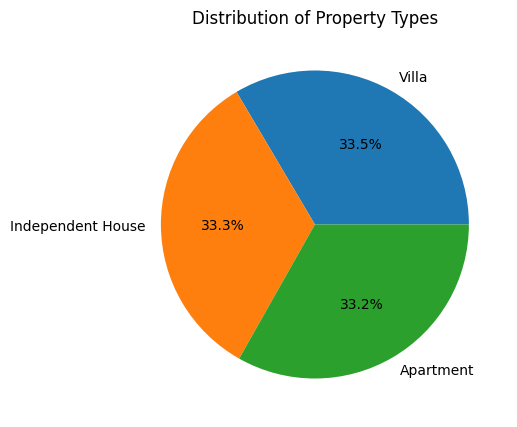

In [34]:
# Property Type Distribution using Pie Chart

plt.figure(figsize=(8,5))
df["Property_Type"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Property Types")
plt.ylabel("")
plt.show()

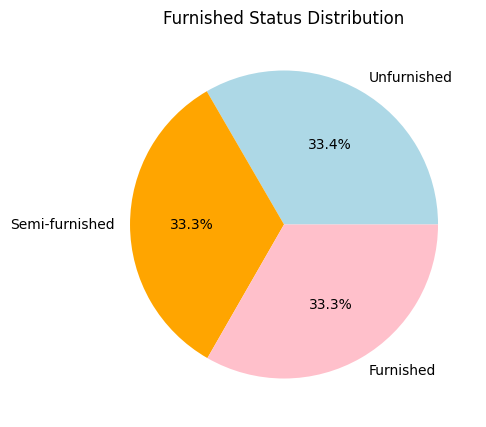

In [35]:
# Furnished Status Distribution

plt.figure(figsize=(8,5))
df["Furnished_Status"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue','orange','pink'])
plt.title("Furnished Status Distribution")
plt.ylabel("")
plt.show()

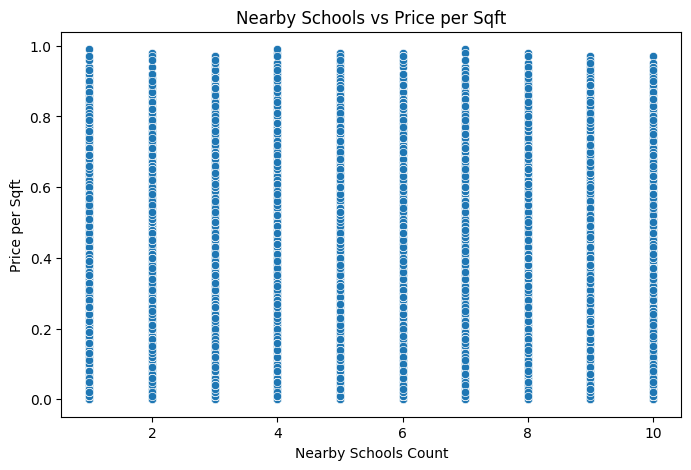

In [36]:
# Nearby Schools vs Price per Sqft

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Nearby_Schools'], y=df["Price_per_SqFt"])
plt.title("Nearby Schools vs Price per Sqft")
plt.xlabel("Nearby Schools Count")
plt.ylabel("Price per Sqft")
plt.show()

### How do nearby schools relate to price per sq ft?

#### More schools in an area often increase demand and price. This checks whether price per sq ft increases with school density. Helps understand education impact on pricing.

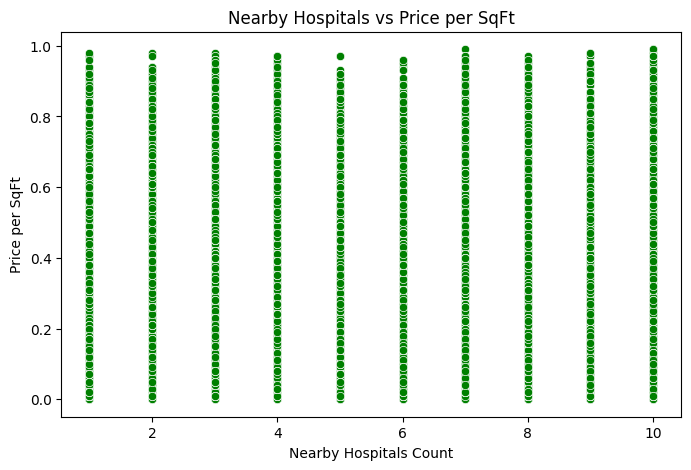

In [37]:
# Nearby hospitals vs Price per Sqft

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Nearby_Hospitals"], y=df["Price_per_SqFt"], color="green")
plt.title("Nearby Hospitals vs Price per SqFt")
plt.xlabel("Nearby Hospitals Count")
plt.ylabel("Price per SqFt")
plt.show()

### How do nearby hospitals relate to price per sq ft?

#### Areas with better healthcare access may have higher property value. This analysis shows whether hospital availability increases pricing. Useful for identifying health-driven real-estate demand.

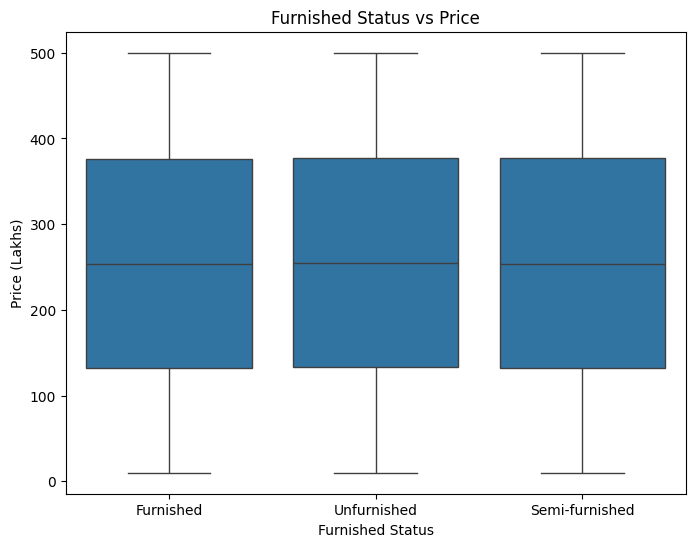

In [38]:
# Furnished Status vs Price

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Furnished_Status", y="Price_in_Lakhs")
plt.title("Furnished Status vs Price")
plt.xlabel("Furnished Status")
plt.ylabel("Price (Lakhs)")
plt.show()

### How does price vary by furnished status?

#### Fully-furnished homes typically cost more than unfurnished ones. This checks how furnishing level influences pricing. Helps buyers estimate the additional value of furnishings.

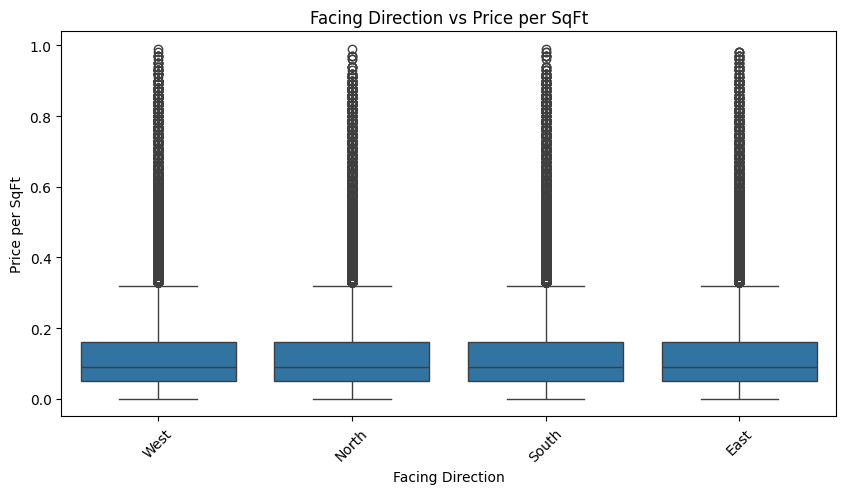

In [39]:
# Facing Direction vs Price per Sqft

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Facing", y="Price_per_SqFt")
plt.title("Facing Direction vs Price per SqFt")
plt.xlabel("Facing Direction")
plt.ylabel("Price per SqFt")
plt.xticks(rotation=45)
plt.show()

### How does price per sq ft vary by property facing direction?

#### Some directions (East, North) are considered premium in many markets. This analysis shows whether facing direction impacts pricing. Useful for understanding cultural or Vastu preferences.

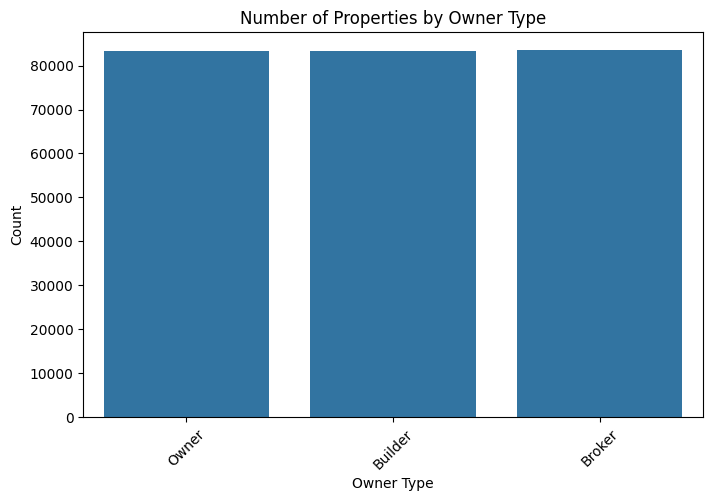

In [40]:
# Count of Properties by Owner Type

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Owner_Type")
plt.title("Number of Properties by Owner Type")
plt.xlabel("Owner Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### How many properties belong to each owner type?

#### Shows the count of properties listed by individuals, builders, and agents. Helps understand who dominates the listings in the dataset. Useful for business segmentation.

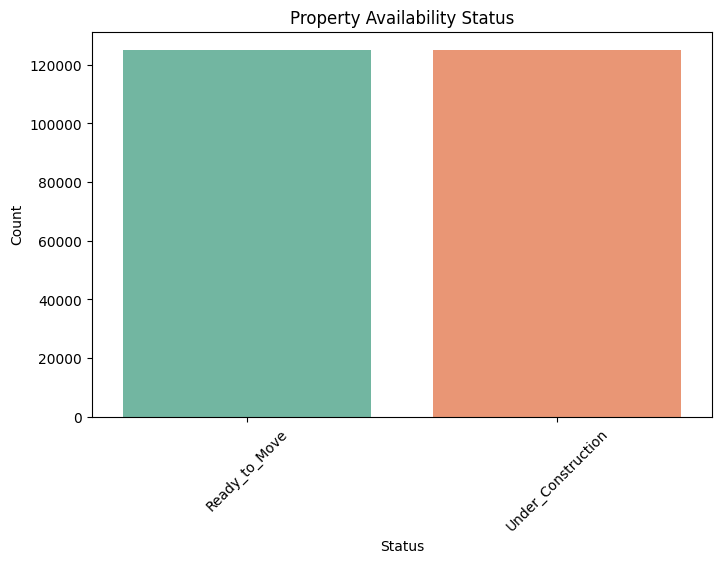

In [41]:
# Count of Properties by Availability status

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Availability_Status", palette="Set2")
plt.title("Property Availability Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### How many properties are available under each availability status?

#### Displays how many properties are Ready-to-Move, Under Construction, or Sold. Helps examine market availability patterns. Useful for understanding supply-demand balance.

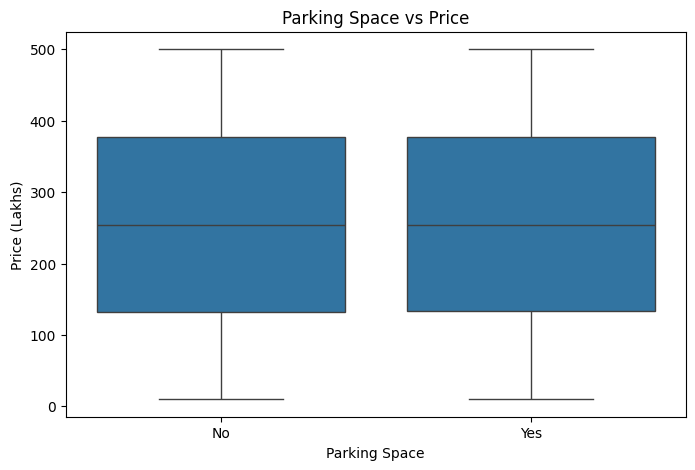

In [42]:
# Impact of Parking space on Price

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Parking_Space", y="Price_in_Lakhs")
plt.title("Parking Space vs Price")
plt.xlabel("Parking Space")
plt.ylabel("Price (Lakhs)")
plt.show()

### Does parking space affect property price?

#### Checks whether properties with more parking spots cost more. Parking often increases convenience and property value. Useful for understanding premium add-ons.

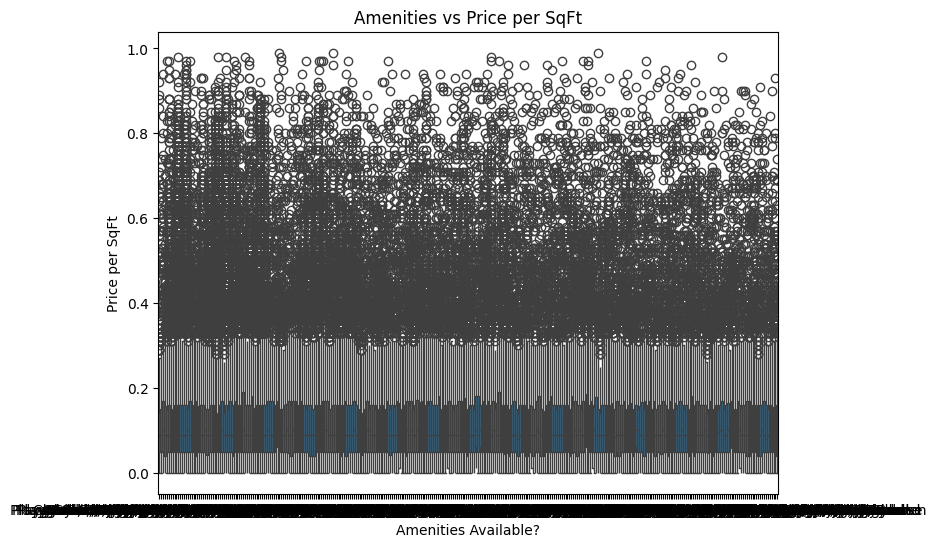

In [43]:
# Effect on Amenities on Price per Sqft

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Amenities", y="Price_per_SqFt")
plt.title("Amenities vs Price per SqFt")
plt.xlabel("Amenities Available?")
plt.ylabel("Price per SqFt")
plt.show()

### How do amenities affect price per sq ft?

#### More amenities (gym, pool, clubhouse) often increase price per sq ft. This analysis measures how amenity-rich properties compare to basic ones. Shows the value buyers place on lifestyle features.

## Prepare data for Machine Learning

In [44]:
# Defining the Features (X) and Target (y)

y_class = df['Good_Investment']
y_reg = df['Future_Price_5Y']

# Dropping Target Columns and any ID-like columns from data
drop_cols = ['Good_Investment', 'Future_Price_5Y']
if "ID" in df.columns:
    drop_cols.append("ID")

X = df.drop(columns=drop_cols)
X.head()

,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,Furnished,22,1,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,Unfurnished,21,20,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,Semi-furnished,19,27,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,Furnished,21,26,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,Semi-furnished,3,2,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [45]:
# Identifying Numeric and categorical Columns

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.to_list()
categorical_features = X.select_dtypes(include=["object"]).columns.to_list()

print("Numerical Features:", numeric_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals']
Categorical Features: ['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']


In [46]:
# Splitting into train and test

X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X, y_class, y_reg, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_class_train.shape, y_class_test.shape, y_reg_train.shape, y_reg_test.shape

((200000, 22), (50000, 22), (200000,), (50000,), (200000,), (50000,))

## Preprocessing and Classification Model (Good_Investment)

In [47]:
# Preprocessing for numeric and categorical columns

# For numeric columns will use impute missing with median, then scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler())
])

# For categorical columns will use impute with most frequent and then one-hot encode it.
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])

# Combining into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [48]:
# Creating a Pipeline for Preprocessing and RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

clf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", clf)
])

# Training the classifier
clf_pipeline.fit(X_train, y_class_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [49]:
# Evaluate classification model

y_class_pred = clf_pipeline.predict(X_test)
pd.DataFrame({'Actual' : y_class_test, 'Predicted' : y_class_pred}).head(10)

,Actual,Predicted
38683,0,0
64939,1,1
3954,1,1
120374,0,0
172861,1,1
149303,1,1
111626,1,1
164553,0,0
55779,0,0
141990,1,1


In [50]:
# Metrics
acc = accuracy_score(y_class_test, y_class_pred)
f1 = f1_score(y_class_test, y_class_pred)

print("Classification Results:")
print("Accuracy:", acc)
print("F1 Score:", f1)
print()
# Confusion matrix
cm = confusion_matrix(y_class_test, y_class_pred)
print("Confusion Matrix:\n", cm)

Classification Results:
Accuracy: 0.99804
F1 Score: 0.9980946455651903

Confusion Matrix:
 [[24234     0]
 [   98 25668]]


## Regression Model

In [51]:
# Creating a LGBM Regression Model

reg = LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=7,
    random_state=42
)

reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", reg)
])

reg_pipeline.fit(X_train, y_reg_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2590
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 919
[LightGBM] [Info] Start training from score 374.024685


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [52]:
# Predicting on test set
y_reg_pred = reg_pipeline.predict(X_test)

pd.DataFrame({'Actual' : y_reg_test, 'Predicted' : y_reg_pred}).head(10)

,Actual,Predicted
38683,377.058971,378.357452
64939,126.420988,126.962287
3954,349.494376,349.496118
120374,498.704643,497.406778
172861,183.651316,184.375482
149303,51.676268,50.268647
111626,405.167217,403.779519
164553,550.645390,551.432058
55779,699.914429,699.587825
141990,305.620240,304.381806


In [55]:
# Evaluating regression model
mse = mean_squared_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_reg_test, y_reg_pred)

print('Regression Results:')
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)

Regression Results:
MSE: 0.6755232302425279
RMSE: 0.8219022023589716
R2 Score: 0.9999843044882556


## Saving the Trained models in Pickle file

In [56]:
import joblib
import os

# creating a folder to store model
os.makedirs("artifacts", exist_ok=True)

# saving classification model
joblib.dump(clf_pipeline, "artifacts/class_model.pkl")

# saving regression model
joblib.dump(reg_pipeline, "artifacts/reg_model.pkl")

print("Models Saved!")

Models Saved!


In [57]:
# saving the splits so mlflow_training.py can load them

joblib.dump(X_train, "artifacts/X_train.pkl")
joblib.dump(X_test, "artifacts/X_test.pkl")
joblib.dump(y_class_train, "artifacts/y_class_train.pkl")
joblib.dump(y_class_test, "artifacts/y_class_test.pkl")
joblib.dump(y_reg_train, "artifacts/y_reg_train.pkl")
joblib.dump(y_reg_test, "artifacts/y_reg_test.pkl")

['artifacts/y_reg_test.pkl']